In [84]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import r2_score
from sklearn.svm import SVC
from collections import Counter
from scipy import stats

In [85]:
df=pd.read_csv("cancer_data.csv")
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [86]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [87]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [88]:
#diagnosis vs mean columns
df_M=df[df['diagnosis']=='M']
radius_M=np.mean(df_M['radius_worst'])-np.mean(df_M['radius_mean'])
texture_M=np.mean(df_M['texture_worst'])-np.mean(df_M['texture_mean'])
perimeter_M=np.mean(df_M['perimeter_worst'])-np.mean(df_M['perimeter_mean'])
area_M=np.mean(df_M['area_worst'])-np.mean(df_M['area_mean'])
smoothness_M=np.mean(df_M['smoothness_worst'])-np.mean(df_M['smoothness_mean'])
compactness_M=np.mean(df_M['compactness_worst'])-np.mean(df_M['compactness_mean'])
concavity_M=np.mean(df_M['concavity_worst'])-np.mean(df_M['concavity_mean'])
concave_points_M=np.mean(df_M['concave points_worst'])-np.mean(df_M['concave points_mean'])
symmetry_M=np.mean(df_M['symmetry_worst'])-np.mean(df_M['symmetry_mean'])
fractal_dimension_M=np.mean(df_M['fractal_dimension_worst'])-np.mean(df_M['fractal_dimension_mean'])

In [89]:
#diagnosis vs worst columns
df_B=df[df['diagnosis']=='B']
radius_B=np.mean(df_B['radius_worst'])-np.mean(df_B['radius_mean'])
texture_B=np.mean(df_B['texture_worst'])-np.mean(df_B['texture_mean'])
perimeter_B=np.mean(df_B['perimeter_worst'])-np.mean(df_B['perimeter_mean'])
area_B=np.mean(df_B['area_worst'])-np.mean(df_B['area_mean'])
smoothness_B=np.mean(df_B['smoothness_worst'])-np.mean(df_B['smoothness_mean'])
compactness_B=np.mean(df_B['compactness_worst'])-np.mean(df_B['compactness_mean'])
concavity_B=np.mean(df_B['concavity_worst'])-np.mean(df_B['concavity_mean'])
concave_points_B=np.mean(df_B['concave points_worst'])-np.mean(df_B['concave points_mean'])
symmetry_B=np.mean(df_B['symmetry_worst'])-np.mean(df_B['symmetry_mean'])
fractal_dimension_B=np.mean(df_B['fractal_dimension_worst'])-np.mean(df_B['fractal_dimension_mean'])

In [90]:
radius_M>radius_B
area_M>area_B

True

In [91]:
texture_M>texture_B
perimeter_M>perimeter_B
smoothness_M>smoothness_B
compactness_M>compactness_B
concavity_M>concavity_B
concave_points_M>concave_points_B
symmetry_M>symmetry_B
fractal_dimension_M>fractal_dimension_B

True

In [92]:
df.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [93]:
# drop unnamed:32 and id columns
df=df.drop(['Unnamed: 32','id'],axis=1)

In [94]:
df.shape

(569, 31)

In [95]:
sum(df.duplicated())

0

Number of Benign:  357
Number of Malignant :  212


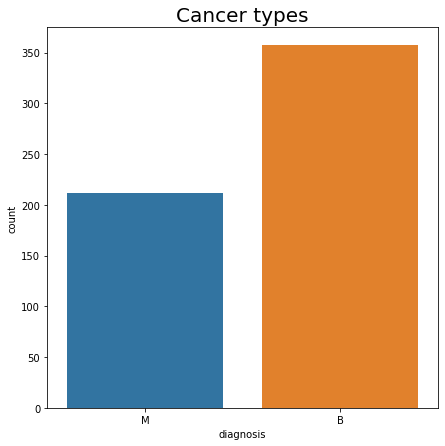

In [96]:
# plot of M and B
plt.figure(figsize = (7,7))
ax = sns.countplot(df["diagnosis"],label="Count")
B, M = df["diagnosis"].value_counts()
print('Number of Benign: ',B)
print('Number of Malignant : ',M)
plt.title('Cancer types', fontsize = 20)
plt.show()

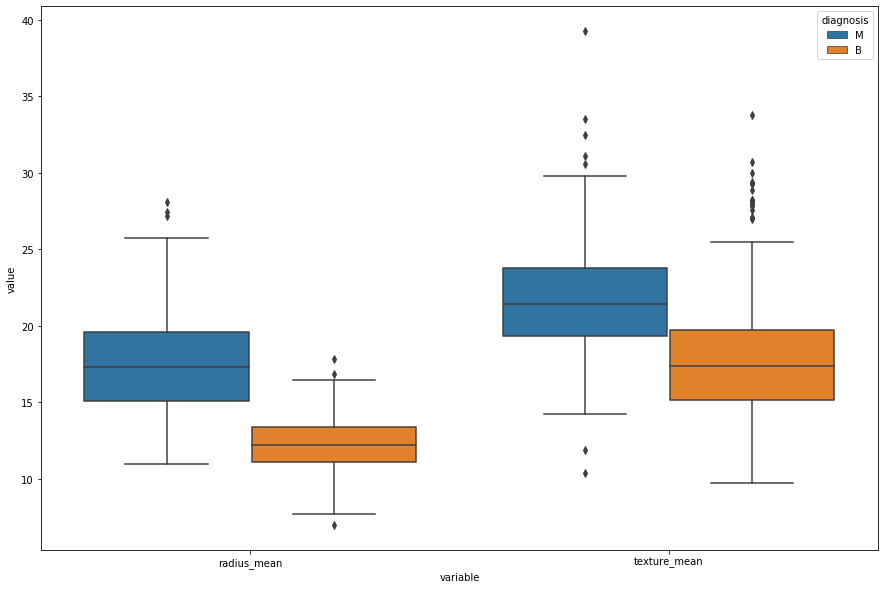

In [97]:
#ound 3 outlier in bening radius mean and in box plot there are 3 outlier.
melted_df = pd.melt(df,id_vars = "diagnosis",value_vars = ['radius_mean', 'texture_mean'])
plt.figure(figsize = (15,10))
sns.boxplot(x = "variable", y = "value", hue="diagnosis",data= melted_df)
plt.show()

In [98]:
desc = df.radius_mean.describe()
desc

count    569.000000
mean      14.127292
std        3.524049
min        6.981000
25%       11.700000
50%       13.370000
75%       15.780000
max       28.110000
Name: radius_mean, dtype: float64

In [99]:
Q1 = desc[4] # %25 value
Q3 = desc[6] # %75 value
IQR = Q3-Q1
lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR
print("Anything outside this range is an outlier: [{:5.3f}, {:5.3f}]".format(lower_bound, upper_bound))

Anything outside this range is an outlier: [5.580, 21.900]


In [100]:
df[df.radius_mean < lower_bound].radius_mean

Series([], Name: radius_mean, dtype: float64)

In [102]:
print("Outliers: ", df[(df.radius_mean < lower_bound) | (df.radius_mean > upper_bound)].radius_mean.values)

Outliers:  [25.22 22.27 24.25 23.27 27.22 23.29 28.11 23.21 23.51 25.73 22.01 27.42
 23.09 24.63]


In [103]:
def detect_outliers(train_data,n,features):
    outlier_indices = []
    for col in features:
        # 1st quartile (25%)
        Q1 = np.percentile(train_data[col], 25)
        # 3rd quartile (75%)
        Q3 = np.percentile(train_data[col],75)
        # Interquartile range (IQR)
        IQR = Q3 - Q1
        outlier_step = 1.5 * IQR
        outlier_list_col = train_data[(train_data[col] < Q1 - outlier_step) | (train_data[col] > Q3 + outlier_step )].index
        outlier_indices.extend(outlier_list_col)
        
    outlier_indices = Counter(outlier_indices)        
    multiple_outliers = list( k for k, v in outlier_indices.items() if v > n )
    
    return multiple_outliers   

# detect outliers
list_atributes = df.drop('diagnosis',axis=1).columns
Outliers_to_drop = detect_outliers(df,2,list_atributes)

In [104]:
df.loc[Outliers_to_drop]
# Drop outliers
df = df.drop(Outliers_to_drop, axis = 0).reset_index(drop=True)

In [105]:
df.shape

(486, 31)

In [106]:
M=df[df["diagnosis"] == "M"]
B=df[df["diagnosis"] == "B"]
print("mean: ",B.radius_mean.mean())
print("variance: ",B.radius_mean.var())
print("standart deviation (std): ",B.radius_mean.std())
print("describe method: ",B.radius_mean.describe())

mean:  12.270116766467071
variance:  2.930276517856178
standart deviation (std):  1.7118050466849835
describe method:  count    334.000000
mean      12.270117
std        1.711805
min        6.981000
25%       11.262500
50%       12.270000
75%       13.457500
max       17.850000
Name: radius_mean, dtype: float64


mean:  13.998126780341988
standart deviation:  3.006418850172937


C:\Users\rupal\anaconda3\lib\site-packages\ipykernel_launcher.py:8: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  


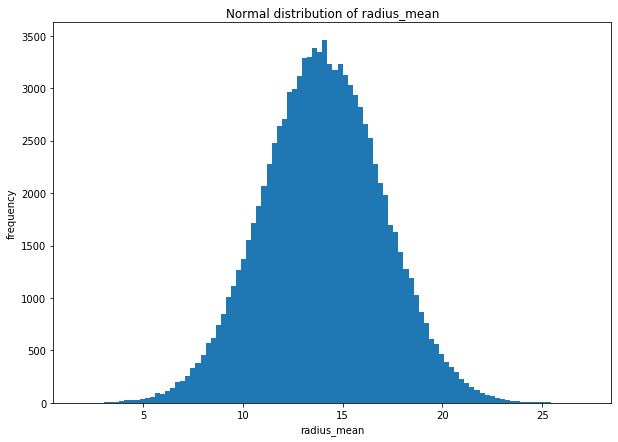

In [108]:
# radius parameters of normal distribution
mu, sigma = round(df.radius_mean.mean()), round(df.radius_mean.std())  # mean and standard deviation
s = np.random.normal(mu, sigma, 100000)
print("mean: ", np.mean(s))
print("standart deviation: ", np.std(s))
# visualize with histogram
plt.figure(figsize = (10,7))
plt.hist(s, 100, normed=False)
plt.ylabel("frequency")
plt.xlabel("radius_mean")
plt.title("Normal distribution of radius_mean")
plt.show()

mean:  602.1997997039992
standart deviation:  263.54543606008474


C:\Users\rupal\anaconda3\lib\site-packages\ipykernel_launcher.py:8: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  


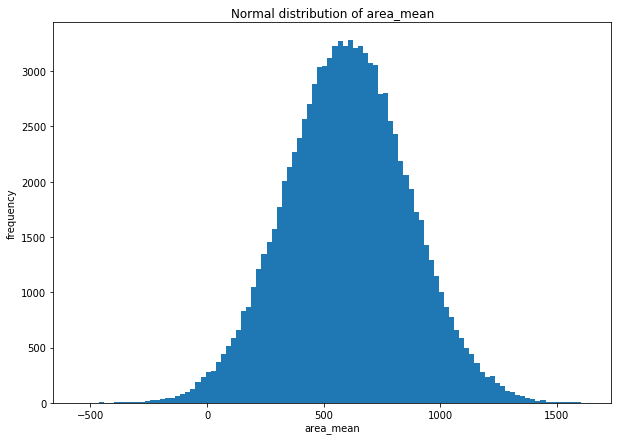

In [109]:
# area parameters of normal distribution
mu, sigma = round(df.area_mean.mean()), round(df.area_mean.std())  # mean and standard deviation
s = np.random.normal(mu, sigma, 100000)
print("mean: ", np.mean(s))
print("standart deviation: ", np.std(s))
# visualize with histogram
plt.figure(figsize = (10,7))
plt.hist(s, 100, normed=False)
plt.ylabel("frequency")
plt.xlabel("area_mean")
plt.title("Normal distribution of area_mean")
plt.show()

In [ ]:
#The z-score value.
* z = (x - mean)/std 
* z1 = (80-110)/20 = -1.5
* z2 = (140-110)/20 = 1.5
* Distance between mean and 80 is 1.5std and distance between mean and 140 is 1.5std.
* If you look at z table, you will see that 1.5std correspond to 0.4332

<Figure size 1080x720 with 0 Axes>

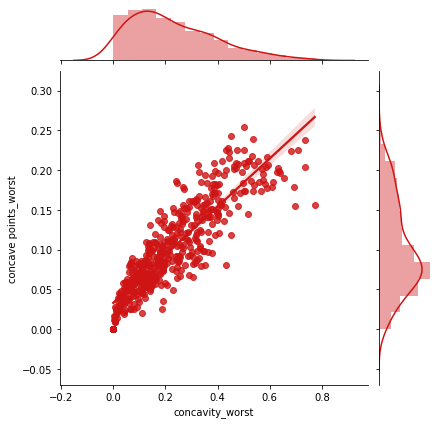

In [56]:
#relationship between radius mean and area mean
plt.figure(figsize = (15,10))
sns.jointplot(df.concavity_worst,df["concave points_worst"],kind="regg",color="#ce1414")
plt.show()

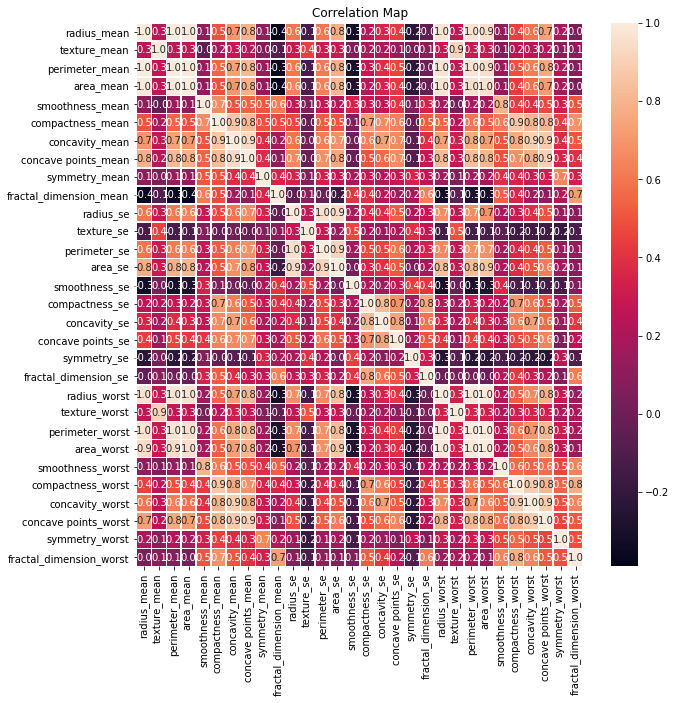

In [57]:
f,ax=plt.subplots(figsize = (10,10))
sns.heatmap(df.corr(),annot= True,linewidths=0.5,fmt = ".1f",ax=ax)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.title('Correlation Map')
plt.savefig('graph.png')
plt.show()

In [58]:
np.cov(df.radius_mean,df.area_mean)
print("Covariance between radius mean and area mean: ",df.radius_mean.cov(df.area_mean))
print("Covariance between radius mean and fractal dimension se: ",df.radius_mean.cov(df.fractal_dimension_se))

Covariance between radius mean and area mean:  746.816352399983
Covariance between radius mean and fractal dimension se:  -0.00014160205765856334


In [59]:
#Pearson Correlation
#pearson correlation between area_mean and radius_mean is 0.98 that means that they are positively correlated with each other and relationship between of the is very high.
p1 = df.loc[:,["area_mean","radius_mean"]].corr(method= "pearson")
p2 = df.radius_mean.cov(df.area_mean)/(df.radius_mean.std()*df.area_mean.std())
print('Pearson correlation: ')
print(p1)
print('Pearson correlation: ',p2)

Pearson correlation: 
             area_mean  radius_mean
area_mean     1.000000     0.992306
radius_mean   0.992306     1.000000
Pearson correlation:  0.9923056717242299


In [63]:
print("Median of area and radius: ",np.median(df['area_mean']))

Median of area and radius:  530.4000000000001


In [64]:
print("Median of area and radius: ",np.median(df['radius_mean']))

Median of area and radius:  13.125


In [110]:
#Hypothesis testing
#null hypothesis is that "relationship between radius mean and area mean is zero in tumor population'.
#P values is almost zero so we can reject null hypothesis.
print("Hypothesis testing")
statistic, p_value = stats.ttest_rel(df.radius_mean,df.area_mean)
print('p-value: ',p_value)

Hypothesis testing
p-value:  1.0269412122994313e-192


<Figure size 360x360 with 0 Axes>

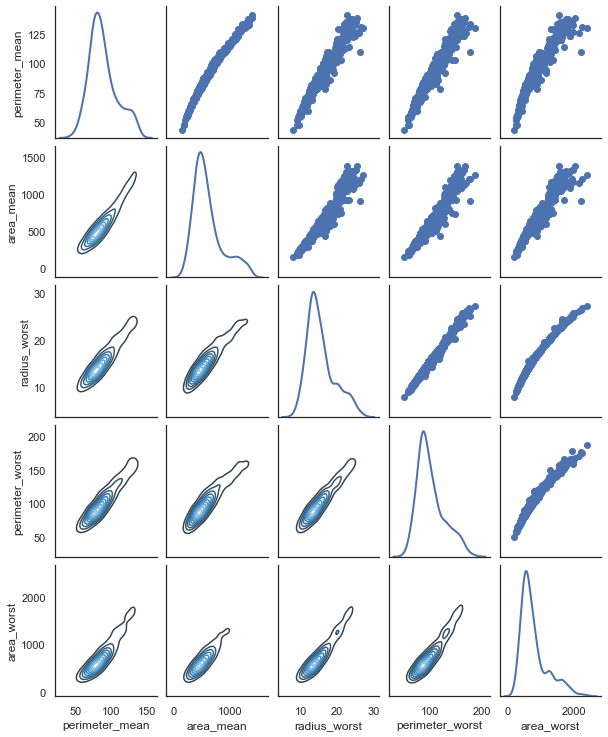

In [39]:
sns.set(style="white")
data = df.loc[:,['perimeter_mean','area_mean','radius_worst','perimeter_worst','area_worst']]
plt.figure(figsize=(5,5))
g = sns.PairGrid(data, diag_sharey=False)
g.map_lower(sns.kdeplot, cmap="Blues_d")
g.map_upper(plt.scatter)
g.map_diag(sns.kdeplot, lw=2)
g.fig.set_size_inches(8,10)

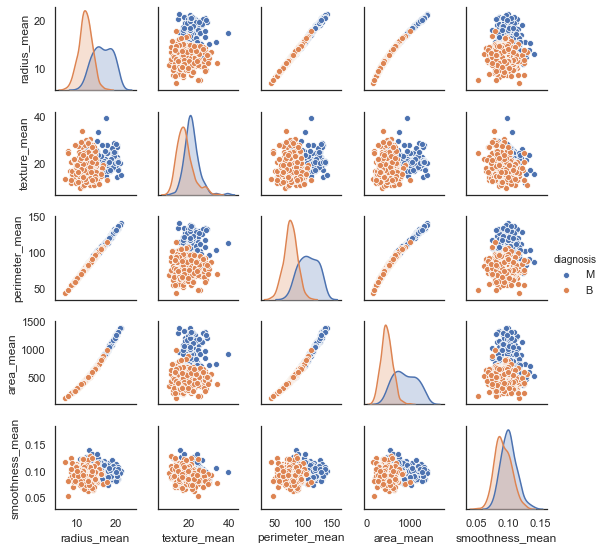

In [44]:
sns.pairplot(df, vars = ['radius_mean','texture_mean','perimeter_mean','area_mean','smoothness_mean'], hue="diagnosis",height=1.5)

Text(0.5, 1.0, 'smoothness mean vs fractal dimension mean')

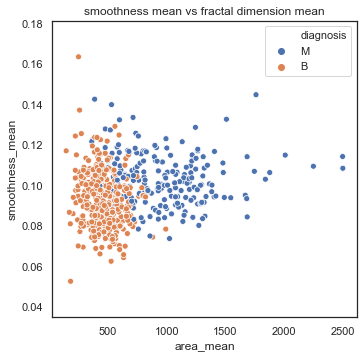

In [18]:
fig = plt.figure(figsize=(12,12))

plt.subplot(221)
ax1 = sns.scatterplot(x = df['area_mean'], y = df['smoothness_mean'], hue = "diagnosis",
                    data = df)
plt.title('smoothness mean vs fractal dimension mean')

In [83]:
list_to_delete = ['perimeter_mean','compactness_mean','concave points_mean',
                  'radius_se','perimeter_se','radius_worst','perimeter_worst','compactness_worst',
                  'concave points_worst','compactness_se','concave points_se','texture_worst','area_worst']
df = df.drop(list_to_delete, axis = 1)

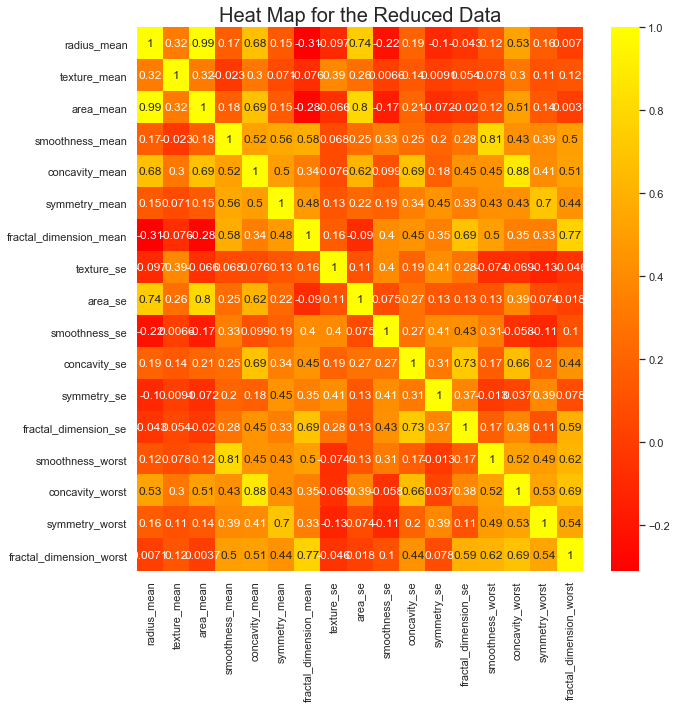

In [84]:
plt.rcParams['figure.figsize'] = (10, 10)
sns.heatmap(df.corr(), annot = True, cmap = 'autumn')
plt.title('Heat Map for the Reduced Data', fontsize = 20)
plt.show()

In [48]:
target_pca = df['diagnosis']
data_pca = df.drop('diagnosis', axis=1)

target_pca = pd.DataFrame(target_pca)

#To make a PCA, normalize data is essential
X_pca = data_pca.values
X_std = StandardScaler().fit_transform(X_pca)

pca = PCA(svd_solver='full')
pca_std = pca.fit(X_std, target_pca).transform(X_std)

pca_std = pd.DataFrame(pca_std)
pca_std = pca_std.merge(target_pca, left_index = True, right_index = True, how = 'left')
pca_std['diagnosis'] = pca_std['diagnosis'].replace({1:'malignant',0:'benign'})

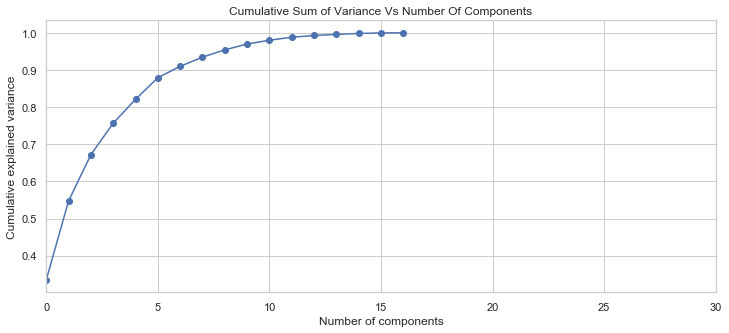

In [49]:
sns.set_style('whitegrid')
plt.figure(figsize=(12,5))
plt.plot(np.cumsum(pca.explained_variance_ratio_),marker='o')
plt.xlim(0,30,1)
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.title('Cumulative Sum of Variance Vs Number Of Components')
plt.show()

In [50]:
data = df.loc[:,['radius_mean','area_mean','smoothness_mean']]
data.describe()

,radius_mean,area_mean,smoothness_mean
count,486.000000,486.000000,486.000000
mean,13.664257,601.610288,0.094787
std,2.859018,263.239723,0.013159
min,6.981000,143.500000,0.052630
25%,11.702500,420.300000,0.085087
50%,13.125000,530.400000,0.094420
75%,15.057500,699.850000,0.103575
max,21.370000,1386.000000,0.139800


In [51]:
X = df.drop('diagnosis', axis=1)
y = df['diagnosis']
X = preprocessing.normalize(X)
# Split into training and test set
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state=42, stratify=y)

In [52]:
steps = [('scaler', StandardScaler()),
        ('knn', KNeighborsClassifier())]
        
# Create the pipeline: pipeline
pipeline = Pipeline(steps)

# Create train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state=42, stratify=y)

# Fit the pipeline to the training set: knn_scaled
scaled = pipeline.fit(X_train,y_train)
y_pred_scaled=scaled.predict(X_test)

# Compute and print metrics
print('Accuracy with Scaling of knn model: {}'.format(scaled.score(X_test,y_test)))
print("Confusion matrix is\n ",confusion_matrix(y_test,y_pred_scaled))
print("Classification report is-\n ",classification_report(y_test,y_pred_scaled))

Accuracy with Scaling of knn model: 0.9246575342465754
Confusion matrix is
  [[95  5]
 [ 6 40]]
Classification report is-
                precision    recall  f1-score   support

           B       0.94      0.95      0.95       100
           M       0.89      0.87      0.88        46

    accuracy                           0.92       146
   macro avg       0.91      0.91      0.91       146
weighted avg       0.92      0.92      0.92       146



In [53]:
steps = [('scaler', StandardScaler()),
        ('svm', SVC())]
        
# Create the pipeline: pipeline
pipeline = Pipeline(steps)

# Create train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state=42, stratify=y)

# Fit the pipeline to the training set: knn_scaled
scaled = pipeline.fit(X_train,y_train)
y_pred_scaled=scaled.predict(X_test)

# Compute and print metrics
ac = scaled.score(X_test,y_test)
print('Accuracy of SVC: ',ac)
print("Confusion matrix is\n ",confusion_matrix(y_test,y_pred_scaled))
print("Classification report is-\n ",classification_report(y_test,y_pred_scaled))

Accuracy of SVC:  0.9452054794520548
Confusion matrix is
  [[99  1]
 [ 7 39]]
Classification report is-
                precision    recall  f1-score   support

           B       0.93      0.99      0.96       100
           M       0.97      0.85      0.91        46

    accuracy                           0.95       146
   macro avg       0.95      0.92      0.93       146
weighted avg       0.95      0.95      0.94       146



In [54]:
steps = [('scaler', StandardScaler()),
        ('logistic', LogisticRegression())]
        
# Create the pipeline: pipeline
pipeline = Pipeline(steps)

# Create train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state=42, stratify=y)

# Fit the pipeline to the training set: knn_scaled
scaled = pipeline.fit(X_train,y_train)
y_pred_scaled=scaled.predict(X_test)

# Compute and print metrics
print('Accuracy with Scaling of logistic regression: {}'.format(scaled.score(X_test,y_test)))
print("Confusion matrix is\n ",confusion_matrix(y_test,y_pred_scaled))
print("Classification report is-\n ",classification_report(y_test,y_pred_scaled))

Accuracy with Scaling of logistic regression: 0.9657534246575342
Confusion matrix is
  [[100   0]
 [  5  41]]
Classification report is-
                precision    recall  f1-score   support

           B       0.95      1.00      0.98       100
           M       1.00      0.89      0.94        46

    accuracy                           0.97       146
   macro avg       0.98      0.95      0.96       146
weighted avg       0.97      0.97      0.97       146



In [55]:
steps = [('scaler', StandardScaler()),
        ('random', RandomForestClassifier())]
        
# Create the pipeline: pipeline
pipeline = Pipeline(steps)

# Create train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state=42, stratify=y)

# Fit the pipeline to the training set: knn_scaled
scaled = pipeline.fit(X_train,y_train)
y_pred_scaled=scaled.predict(X_test)

# Compute and print metrics
print('Accuracy with Scaling of Random forest: {}'.format(scaled.score(X_test,y_test)))
print("Confusion matrix is\n ",confusion_matrix(y_test,y_pred_scaled))
print("Classification report is-\n ",classification_report(y_test,y_pred_scaled))

Accuracy with Scaling of Random forest: 0.9315068493150684
Confusion matrix is
  [[97  3]
 [ 7 39]]
Classification report is-
                precision    recall  f1-score   support

           B       0.93      0.97      0.95       100
           M       0.93      0.85      0.89        46

    accuracy                           0.93       146
   macro avg       0.93      0.91      0.92       146
weighted avg       0.93      0.93      0.93       146

